# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("ALUGUEL_MOD12-M18.csv", delimiter=';')


df.rename(columns={'N_banheiros': 'N_Banheiros'}, inplace=True)
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

R - Não há dados faltantes e o tipo dos dados estão corretos.

In [19]:
#Seu código aqui
(df.isnull().sum()/len(df))*100

Valor_Aluguel       0.0
Valor_Condominio    0.0
Metragem            0.0
N_Quartos           0.0
N_banheiros         0.0
N_Suites            0.0
N_Vagas             0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

R - Realmente existem outliers nas colunas Aluguel, Condominio e Metragem porém eles não parecem ser erros de medida ou digitação e a quantidade deles equivale a menos de 11% em cada
coluna, eu acredito que a causa dos outliers seja os altos valores contidos na base de dados e provavélmente condizem como imóvel por isso eu optei em não altera-los ou exclui-los.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [16]:
#Seu código aqui

df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [45]:
len(df[df['Valor_Aluguel'] > 5900]) /len(df) * 100

10.398445092322643

In [27]:
df['Valor_Aluguel'].unique()

array([  480,   500,   550,   600,   610,   628,   630,   650,   660,
         670,   700,   720,   730,   750,   760,   770,   780,   785,
         790,   800,   805,   810,   825,   830,   833,   840,   850,
         855,   860,   870,   880,   888,   890,   899,   900,   905,
         910,   920,   925,   930,   940,   944,   950,   955,   970,
         980,   990,   999,  1000,  1005,  1010,  1015,  1020,  1030,
        1032,  1040,  1045,  1050,  1070,  1080,  1089,  1090,  1099,
        1100,  1105,  1115,  1120,  1131,  1132,  1140,  1145,  1150,
        1160,  1165,  1170,  1175,  1176,  1180,  1185,  1190,  1199,
        1200,  1205,  1210,  1220,  1230,  1240,  1250,  1260,  1270,
        1280,  1290,  1295,  1297,  1299,  1300,  1309,  1310,  1320,
        1330,  1335,  1342,  1343,  1346,  1348,  1350,  1360,  1365,
        1370,  1372,  1375,  1380,  1381,  1385,  1390,  1399,  1400,
        1409,  1414,  1420,  1428,  1430,  1440,  1441,  1447,  1450,
        1460,  1475,

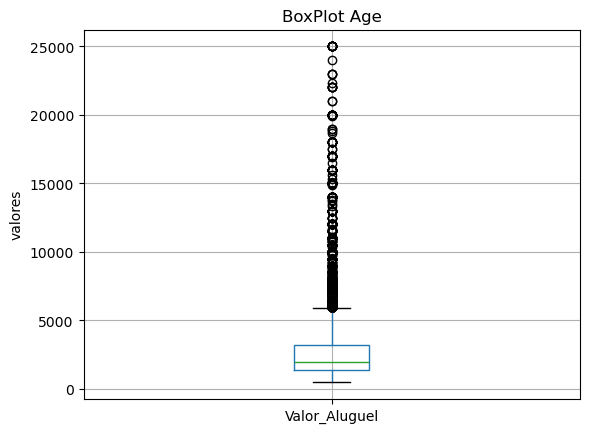

In [9]:
df.boxplot(column='Valor_Aluguel')
plt.title('BoxPlot Aluguel')
plt.ylabel('valores')
plt.show()

In [13]:
len(df[df['Valor_Condominio'] > 1854]) /len(df) * 100

8.135499097598222

In [47]:
df['Valor_Condominio'].unique()

array([ 295,    0,   36, ..., 5636, 6000, 1587], dtype=int64)

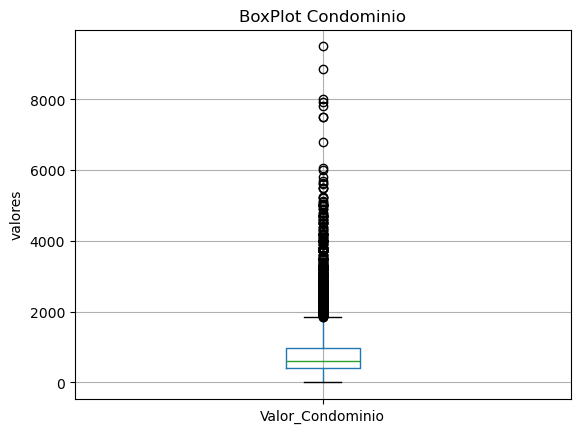

In [17]:
df.boxplot(column='Valor_Condominio')
plt.title('BoxPlot Condominio')
plt.ylabel('valores')
plt.show()

In [41]:
len(df[df['Metragem'] > 172]) /len(df) * 100

8.982368457587118

In [23]:
df['Metragem'].unique()

array([ 48,  50,  40,  45,  30,  66,  46,  49,  90,  35,  52,  38,  41,
        60,  43,  44,  42,  47,  56,  54,  62,  53,  39,  51,  34,  32,
        70,  58,  55,  65,  57,  36,  63,  67,  80,  61,  71, 158,  59,
        68,  64,  96,  92,  75,  72, 100,  31,  76,  78,  77,  37,  33,
       110,  73, 101,  85,  98,  86,  69, 130,  88, 120,  74,  82,  97,
        79, 161, 125, 105,  84,  95, 208,  81,  89,  83, 144, 117,  99,
       230,  91, 111, 140, 115, 109, 127, 126, 142, 102,  87, 112, 153,
       165, 150, 145,  93, 250, 154, 139, 132, 136,  94, 114, 104, 167,
       157, 129, 138, 225, 400, 103, 122, 170, 106, 300, 135, 107, 134,
       163, 156, 220, 193, 149, 280, 147, 160, 180, 200, 137, 146, 113,
       118, 278, 143, 201, 206, 123, 124, 119, 231, 203, 354, 186, 194,
       133, 267, 108, 198, 210, 131, 393, 196, 152, 162, 314, 217, 173,
       148, 234, 276, 175, 128, 232, 197, 330, 116, 185, 155, 172, 325,
       189, 166, 192, 237, 183, 221, 178, 176, 195, 164, 190, 16

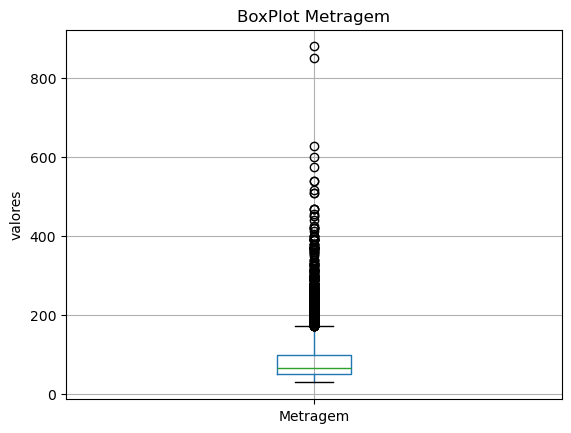

In [21]:
df.boxplot(column='Metragem')
plt.title('BoxPlot Metragem')
plt.ylabel('valores')
plt.show()

# Análise Bivariada dos dados.

Na analise entre o aluguel e o condominio é possivel ver uma concentração maior nos alugueis de 10 mil reais e condominios de 2 mil.

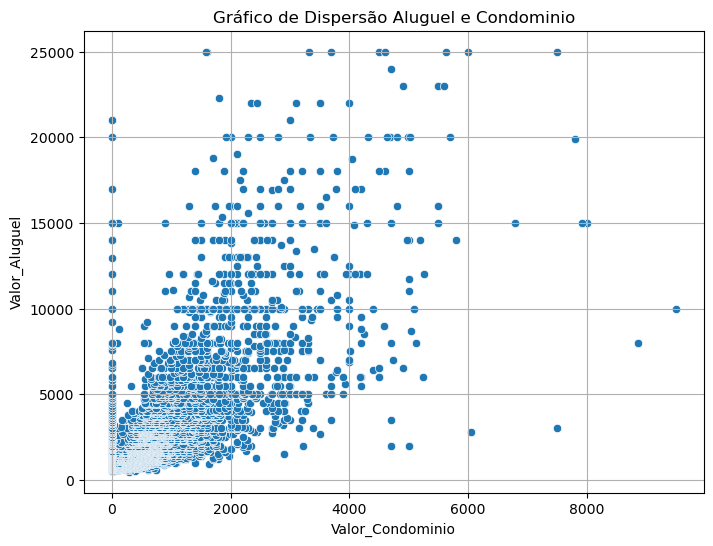

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Valor_Condominio', y='Valor_Aluguel')
plt.title("Gráfico de Dispersão Aluguel e Condominio")
plt.xlabel("Valor_Condominio")
plt.ylabel("Valor_Aluguel")
plt.grid(True)
plt.show()

Na comparação entre o numero de quartos e a metragem a maior concentração está em 200m² com 4 quartos até os 500m² com 6 quartos.

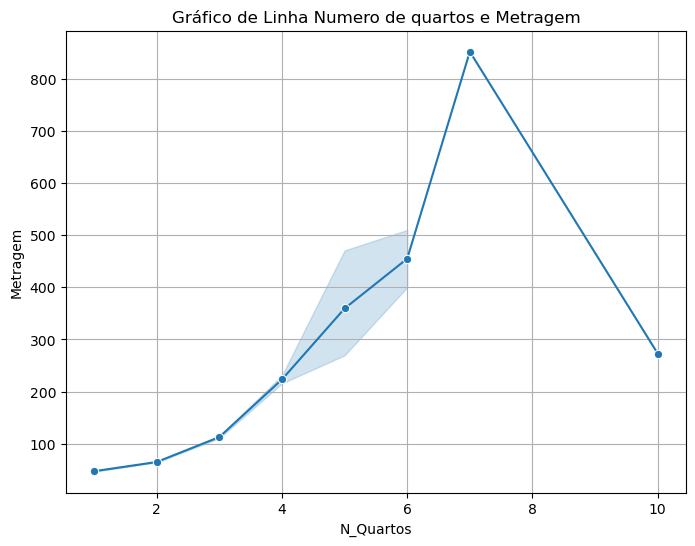

In [73]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='N_Quartos', y='Metragem', marker='o')
plt.title("Gráfico de Linha Numero de quartos e Metragem")
plt.xlabel("N_Quartos")
plt.ylabel("Metragem")
plt.grid(True)
plt.show()

Entre a metragem e o aluguel é possivel reparar a maior concentração nos alugueis de 10 mil reais com 200m².
Reunindo a analise de outros graficos precebe-se que a maioria das casas para locação possuem 200m² com 4 quartos, um aluguem de 10 mil reais e um condominio de 2 mil.

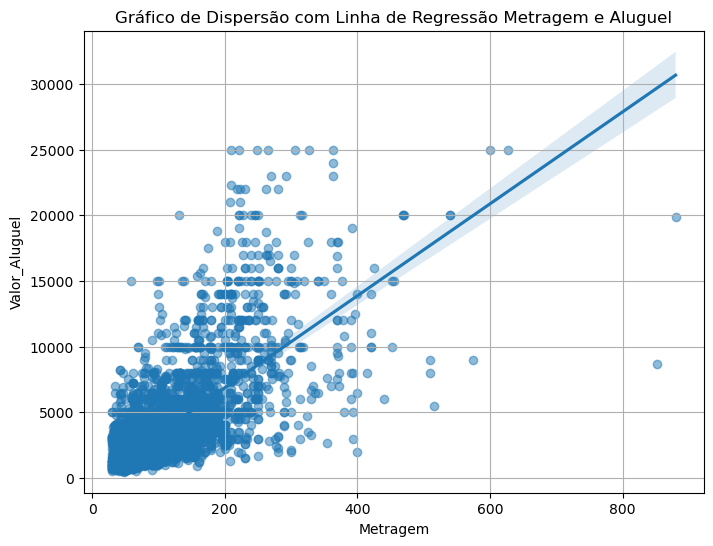

In [89]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Metragem', y='Valor_Aluguel', scatter_kws={'alpha':0.5})
plt.title("Gráfico de Dispersão com Linha de Regressão Metragem e Aluguel")
plt.xlabel("Metragem")
plt.ylabel("Valor_Aluguel")
plt.grid(True)
plt.show()

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




R - As variaveis que apresentam a maior correlação sao valor do condominio x metragem e numero de banheiro x suites.

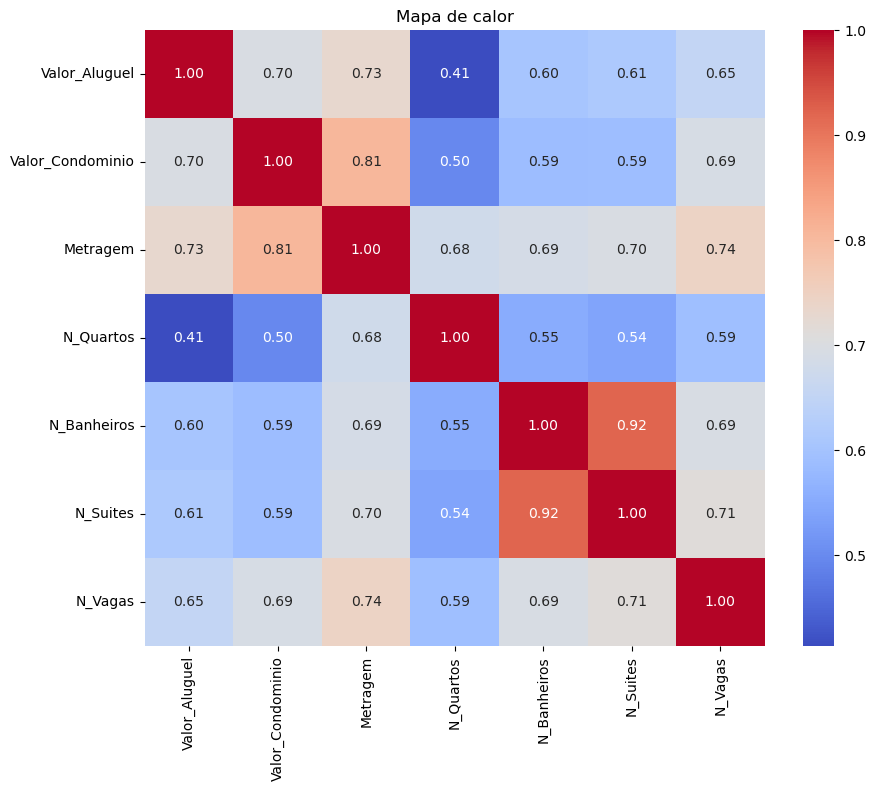

In [7]:
## Seu código aqui
correlacao = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':10})
plt.title('Mapa de calor')
plt.show()


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [5]:
x = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [7]:
# Seu código aqui
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
x_train.shape

(5402, 6)

In [12]:
x_test.shape

(1801, 6)

In [14]:
y_train.shape

(5402,)

In [16]:
y_test.shape

(1801,)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [9]:
x = x_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [11]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
regressao_treino = LinearRegression()
regressao_treino.fit(x,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [13]:
#Seu código Aqui
regressao_treino.intercept_

-103.17820863080124

In [15]:
regressao_treino.coef_

array([34.70818769])

y = 34.7 * (metragem) + (-103.1)

Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

R - O R2 teve um resultado de 0.52, um resultado mediano mas eu acredito que o modelo teve um bom ajuste a base de treino.

In [17]:
#Seu código aqui
regressao_treino.score(x,y)

0.5213271756253639

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

R - No grafico da reta podemos ver uma concentração muito grande dos dados mas essa concentração permanece proximo a linha com poucos dados disperços a ela.

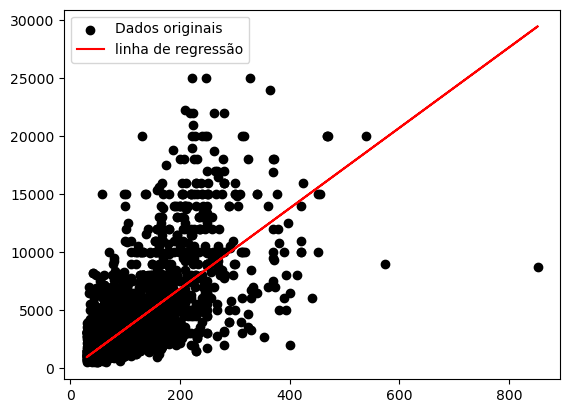

In [25]:
# Seu código aqui
plt.scatter(x, y, color='black', label='Dados originais')
plt.plot(x, regressao_treino.predict(x), color='red', label='linha de regressão')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [19]:
x_test = x_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

regressao_teste = LinearRegression()
regressao_teste.fit(x,y)

LinearRegression()

In [21]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_teste.predict(x_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_teste.score(x_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

R - O resultado do R2 no treino teve uma pontuação de 0.52 e no teste teve uma pontuação de 0.56, embora a base de treino e teste não esteja muito proximo de 1 o resultado fui bom ja que a base de treino e teste teve um resultado muito proximo um do outro.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [46]:
#seu código aqui
x_multiplo = df[['Metragem','Valor_Condominio','N_Quartos','N_Banheiros','N_Suites','N_Vagas']]
y_multiplo = df['Valor_Aluguel']

from sklearn.model_selection import train_test_split
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multiplo, y_multiplo, test_size=0.25, random_state=42)

In [50]:
x_train_multi.shape

(5402, 6)

In [52]:
x_test_multi.shape

(1801, 6)

In [54]:
y_train_multi.shape

(5402,)

In [56]:
y_test_multi.shape

(1801,)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [58]:
#seu código aqui
regressao_treino_multiplo = LinearRegression()
regressao_treino_multiplo.fit(x_train_multi, y_train_multi)

LinearRegression()

In [60]:
regressao_treino_multiplo.intercept_

411.928950773764

In [64]:
regressao_treino_multiplo.coef_

array([  20.72122898,    0.77302112, -659.00604215,  240.76046013,
        340.61447028,  522.98401929])

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [66]:
#seu código aqui
regressao_treino_multiplo.score(x_treino_multiplo, y_treino_multiplo)

0.5971610197647366

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [68]:
#seu código aqui
regressao_teste_multiplo = LinearRegression()
regressao_teste_multiplo.fit(x_test_multi, y_test_multi)

LinearRegression()

In [70]:
previsoes = regressao_teste_multiplo.predict(x_test_multi)

r2 = regressao_teste_multiplo.score(x_test_multi, y_test_multi)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6375971027023317


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui

R - Nos resultados do R2, a regressao linear simples teve um pontuação de 0.52 no treino e 0.56 teste e na regressao linear multipla teve uma pontuação de 
0.59 no treino e 0.63 no teste, comparando a pontuação R2 nas duas regressoes, a regressao linear multipla obteve um melhor resultado, eu acredito que isso ocorreu
devido a inclusão de mais variaveis com a correlação alta entre si, isso ajudou o modelo a se ajustar melhor na base de treino e teste.